<a href="https://colab.research.google.com/github/meghmodi2810/Machine-Learning-Projects/blob/main/LogisticRegressionTitanicDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math

titanic_data = pd.read_csv("sample_data/Titanic-Dataset.csv")
print(titanic_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

<Axes: xlabel='Survived', ylabel='count'>

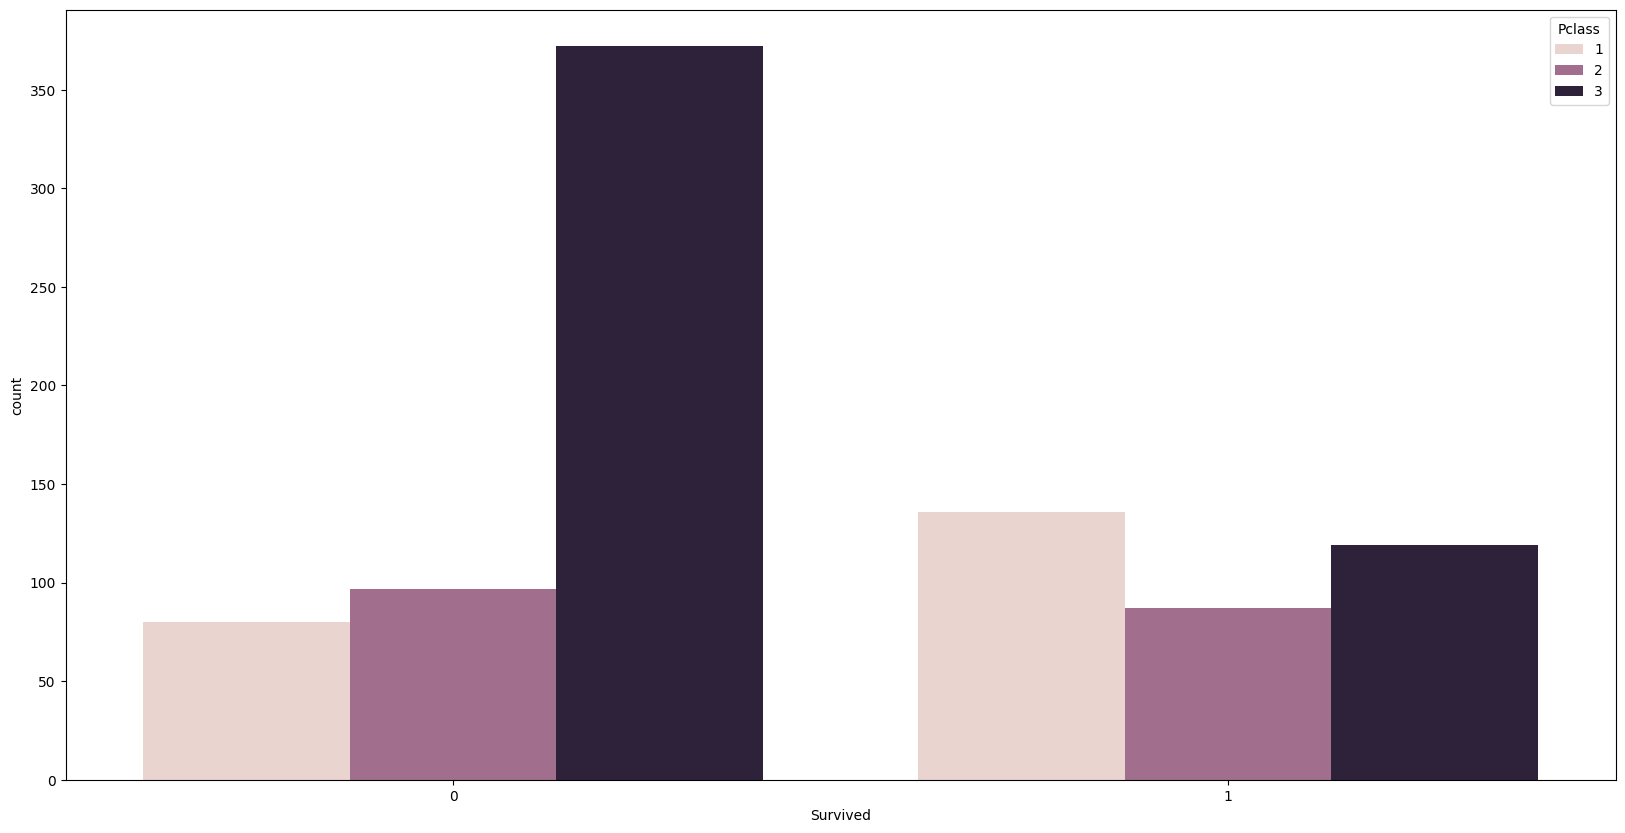

In [98]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

<Axes: ylabel='Frequency'>

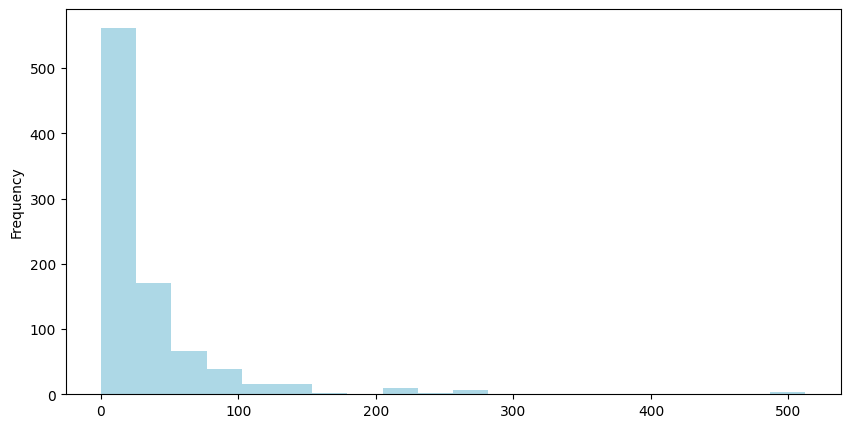

In [99]:
titanic_data["Fare"].plot.hist(bins=20, figsize=(10, 5), color="lightblue")

In [100]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

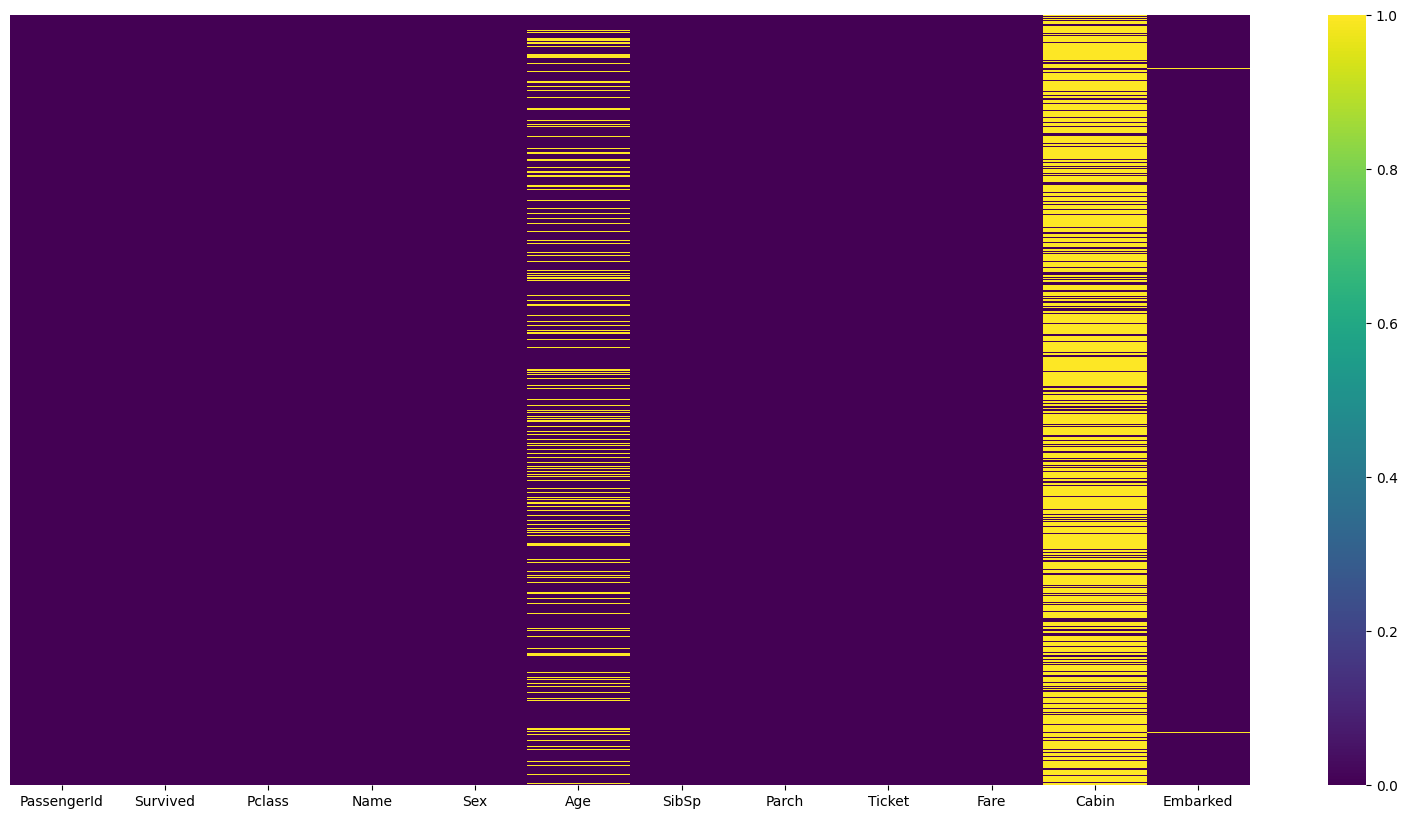

In [101]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")

<Axes: xlabel='Pclass', ylabel='Age'>

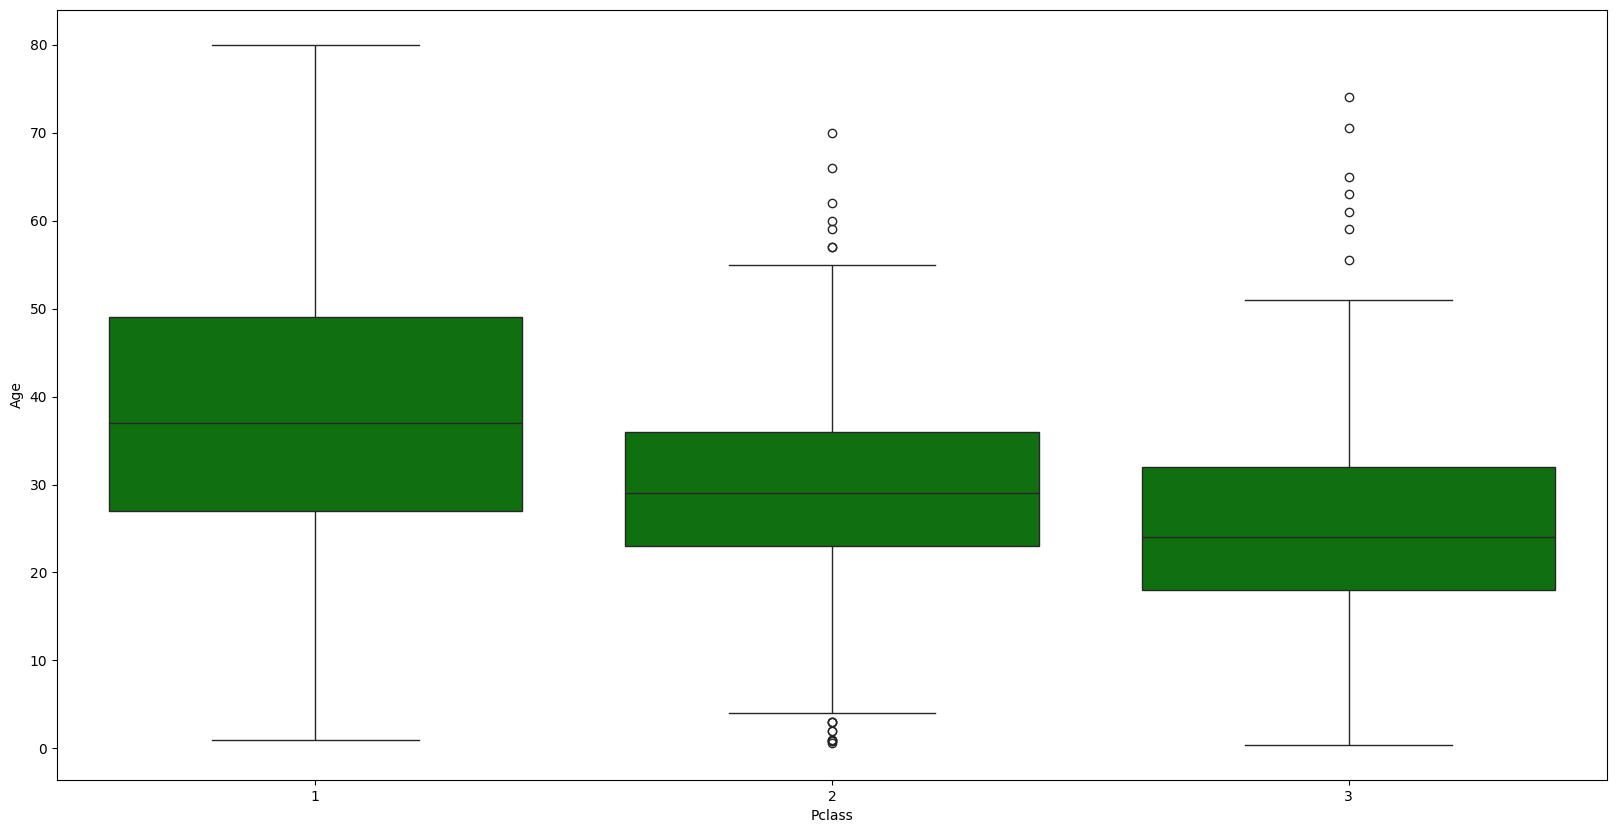

In [102]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data, color="green")

In [114]:
titanic_data.drop("Cabin", inplace=True, axis=1)
titanic_data.head()
titanic_data.dropna(inplace=True)

<Axes: >

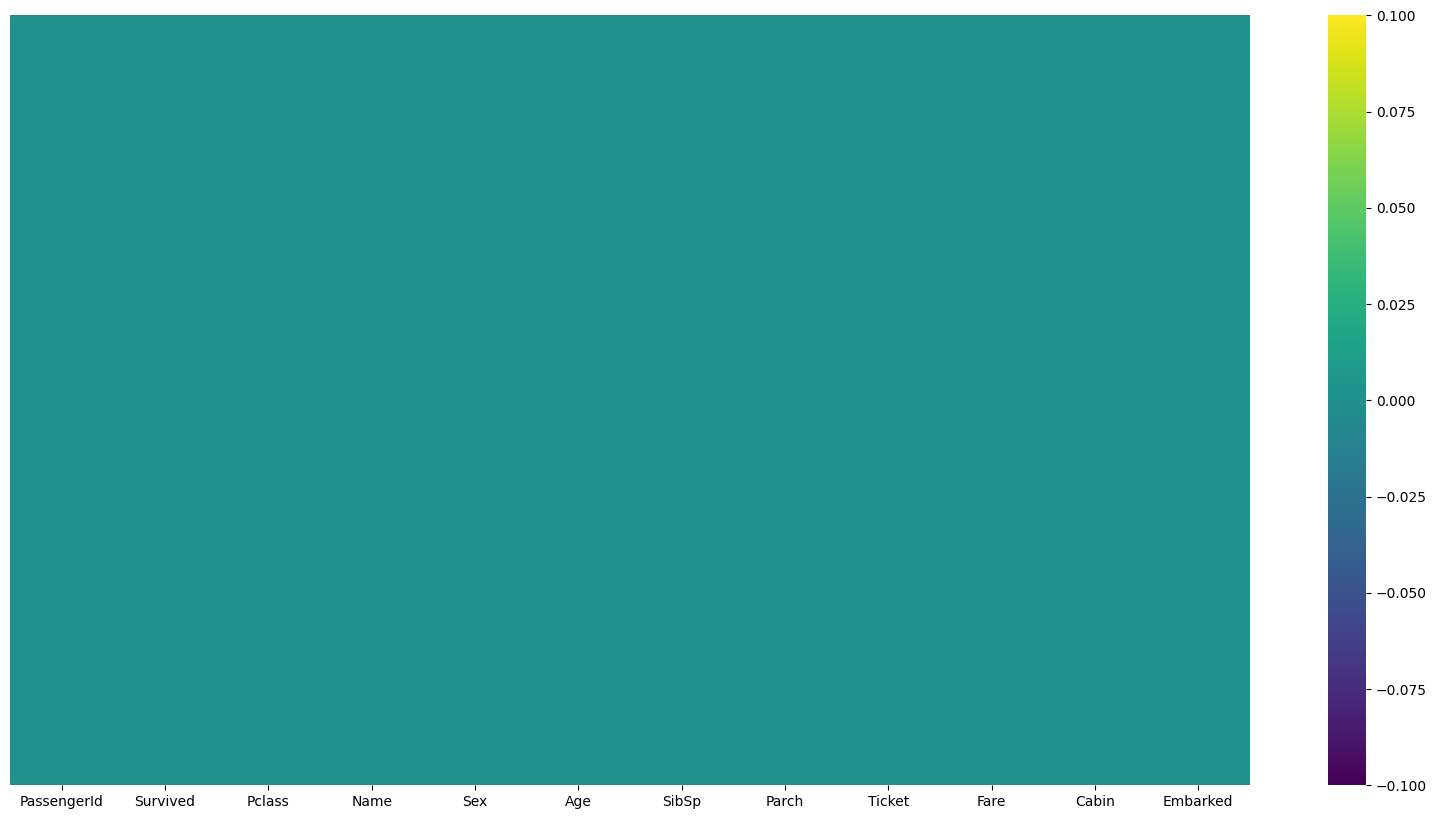

In [104]:
sns.heatmap(titanic_data.isnull(), cmap="viridis", yticklabels=False)

In [105]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [106]:
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True)
sex.head(5)

,male
1,False
3,False
6,True
10,False
11,False


In [107]:
embark = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
embark.head(5)

,Q,S
1,False,False
3,False,True
6,False,True
10,False,True
11,False,True


In [108]:
pcl = pd.get_dummies(titanic_data['Pclass'], drop_first=True)
pcl.head(5)

,2,3
1,False,False
3,False,False
6,False,False
10,False,True
11,False,False


In [109]:
# titanic_data.drop(titanic_data.columns, axis=1  )
titanic_data = pd.concat([titanic_data, sex, embark, pcl], axis=1)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True,False,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,True,False,True,False,False
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,False,False,True,False,True
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,False,False,True,False,False


In [115]:
# titanic_data.drop(['Sex', 'Name', 'Pclass', 'Embarked', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
1,1,38.0,1,0,71.2833,False,False,False,False,False
3,1,35.0,1,0,53.1000,False,False,True,False,False
6,0,54.0,0,0,51.8625,True,False,True,False,False
10,1,4.0,1,1,16.7000,False,False,True,False,True
11,1,58.0,0,0,26.5500,False,False,True,False,False


In [121]:
print(titanic_data.columns)

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3], dtype='object')


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Fix column names in the full dataset before selecting features
titanic_data.columns = titanic_data.columns.map(str)

In [136]:
X = titanic_data.drop("Survived", axis=1)
y = titanic_data["Survived"]

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [143]:
classifier = LogisticRegression(max_iter=1000)

In [144]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [153]:
LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

LogisticRegression()

In [154]:
predictions = classifier.predict(X_test)

In [155]:
from sklearn.metrics import classification_report

In [156]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.57      0.47      0.52        17\n           1       0.78      0.84      0.81        38\n\n    accuracy                           0.73        55\n   macro avg       0.68      0.66      0.66        55\nweighted avg       0.72      0.73      0.72        55\n'

In [157]:
from sklearn.metrics import confusion_matrix

In [158]:
confusion_matrix(y_test, predictions)

array([[ 8,  9],
       [ 6, 32]])

In [159]:
from sklearn.metrics import accuracy_score

In [163]:
accuracy_score(y_test, predictions) * 100

72.72727272727273